<a href="https://colab.research.google.com/github/Auckland68/Projects/blob/main/Case_Study_1806874.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1.0 Import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")

[Dataset Source]("https://dasl.datadescription.com/datafile/housing-prices-ge19/?_sfm_methods=Multiple+Regression&_sfm_cases=4+59943&sf_paged=2")

[Original Study:
"Stat 101" case study "How much is a Fireplace Worth" by Candice Corvetti.](https://community.amstat.org/stats101/home)


In [ ]:
data = pd.read_csv("https://dasl.datadescription.com/download/data/3276", sep = "\t")
data.head()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Test
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5,0
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6,1
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8,1
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5,0
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3,0


The dataset has 16 features including continuous, discrete and categorical.



# 2.0 Investigation of Dataset

In [ ]:
data.shape

(1734, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 17 columns):
Price            1734 non-null int64
Lot.Size         1734 non-null float64
Waterfront       1734 non-null int64
Age              1734 non-null int64
Land.Value       1734 non-null int64
New.Construct    1734 non-null int64
Central.Air      1734 non-null int64
Fuel.Type        1734 non-null object
Heat.Type        1734 non-null object
Sewer.Type       1734 non-null object
Living.Area      1734 non-null int64
Pct.College      1734 non-null int64
Bedrooms         1734 non-null int64
Fireplaces       1734 non-null int64
Bathrooms        1734 non-null float64
Rooms            1734 non-null int64
Test             1734 non-null int64
dtypes: float64(2), int64(12), object(3)
memory usage: 230.4+ KB


All variables appear to be listed as non-null. However, it seems as if the null values have been listed as zeros in some of the categories, so each feature will be investigated separately below.

It is not clear what the category "Test" refers to so this is dropped from the dataset. The rest of the variable descriptions could be looked up on the link:

[Source](https://rdrr.io/cran/mosaicData/man/SaratogaHouses.html)

# 3.0 Data Cleaning and Exploratory Analysis

In [ ]:
data = data.drop(["Test"],axis = 1)
data.shape

(1734, 16)

In [ ]:
data.describe()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,211545.054210,0.500294,0.008651,28.261822,34536.228374,0.046713,0.366205,1752.630911,55.568627,3.151672,0.599769,1.898501,7.032295
std,98553.809581,0.698201,0.092632,29.860912,34980.940615,0.211084,0.481905,620.224953,10.321193,0.817830,0.556263,0.658355,2.318071
min,5000.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,0.000000,13.000000,15100.000000,0.000000,0.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189700.000000,0.370000,0.000000,19.000000,25000.000000,0.000000,0.000000,1632.000000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,257289.500000,0.540000,0.000000,34.000000,40200.000000,0.000000,1.000000,2133.500000,64.000000,4.000000,1.000000,2.500000,8.000000
max,775000.000000,12.200000,1.000000,225.000000,412600.000000,1.000000,1.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [ ]:
data.mode()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
0,120000,0.46,0.0,19.0,27000.0,0.0,0.0,Gas,Hot Air,Public,1480.0,64.0,3.0,1.0,2.5,7.0
1,150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Detailed analysis of each variable is discussed in the following section in the order they appear in the data table.

# 4.0 Investigation of Variables

## 4.1 Price

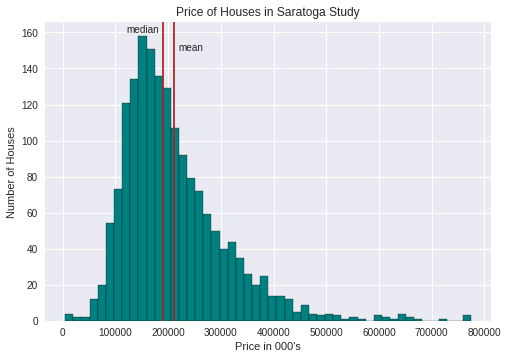

In [ ]:
plt.figsize=(10,8)
plt.hist(data["Price"],bins = 50,ec = "black",color = "teal")
plt.axvline(x=211500,color = "firebrick")
plt.text(220000,150,'mean')
plt.axvline(x = 189700, color = "firebrick")
plt.text(120000,160,"median")
plt.xlabel("Price in 000's")
plt.title("Price of Houses in Saratoga Study")
ax = plt.ylabel("Number of Houses")

The Price variable (target variable) is positively skewed with a mean of approximately 211,500 and median of 189,700. The mean is influenced by a few high value houses over 500,000.

## 4.2 Lot Size

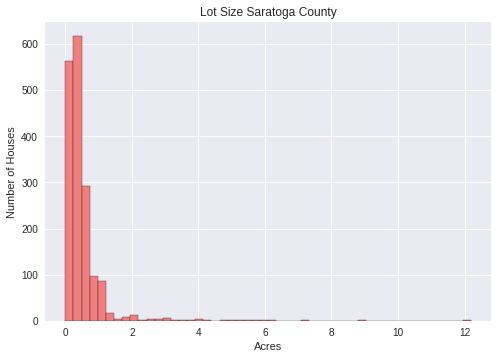

In [ ]:
plt.hist((data["Lot.Size"]),bins = 50,ec = "black",color = "lightcoral")
plt.title("Lot Size Saratoga County")
plt.ylabel("Number of Houses")
ax = plt.xlabel("Acres")

In [ ]:
below_1000 = data[data["Lot.Size"] <= 1]["Lot.Size"].count()
below_1000/len(data)*100

94.69434832756633

In [ ]:
data["Lot.Size"].skew()

7.180188734012175

In [ ]:
data[data["Lot.Size"]== 0]

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
15,89900,0.0,0,88,2500,0,0,Gas,Hot Water,Public,936,57,3,0,1.0,4
701,775000,0.0,1,5,412600,0,1,Gas,Hot Air,Private,2472,57,3,1,2.5,9


It is not clear from the dataset what the scale for the lot size is. The values contained in the dataset appear quite small. This issue is discussed at the following link [here](https://github.com/ProjectMOSAIC/mosaicData/issues/26)

For the purposes of this review, it is assumed to be in acres as the discussion on the above link seems to suggest this is correct. The average lot size is 0.5 acres, with a median of 0.37 acres and a maximum 12.2, so the data is also skewed. Approximately 95% of homes are 1 acre or less.

Looking at the values, there are two with zero lot size, which are perhaps flats. It is also possible the lot size might be recorded as zero when the whole plot of land is used for the house right up to the boundaries.

[Zero Sized Lots](https://www.investopedia.com/terms/z/zero-lot-line-house.asp)

## 4.3 Waterfront

In [ ]:
data["Waterfront"].value_counts()

0    1719
1      15
Name: Waterfront, dtype: int64

In [ ]:
print(data[data["Waterfront"]==1]["Price"].mean())
print(data[data["Waterfront"]==0]["Price"].mean())

373991.6666666667
210127.5445026178


Waterfront properties have a mean value approximately 70 percent higher than those that do not. 

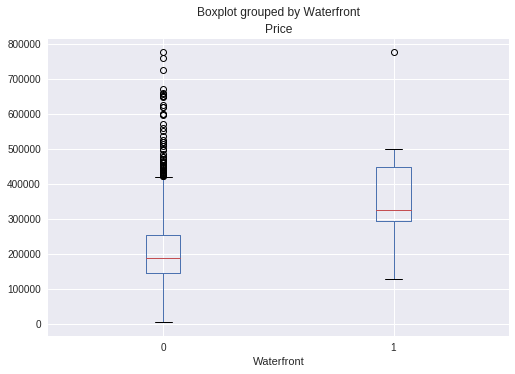

In [ ]:
ax = data.boxplot(by = "Waterfront",column = ["Price"])

In [ ]:
data["Waterfront"] = data["Waterfront"].astype("category")

From the boxplot, the median value is higher for waterfront properties. There is some skew in the data since the median is not centred in the box. The price of non-waterfront properties varies more and there are many outliers.

The variable was set to categorical.

## 4.4 Property Age

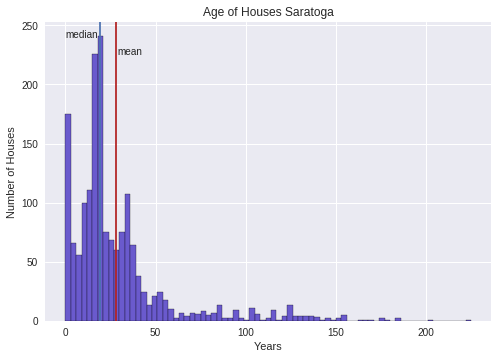

In [ ]:
plt.figsize=(4,2)
plt.hist(data["Age"],bins = 75,ec = "black",color = "slateblue")
plt.axvline(x=28.26,color = "firebrick")
plt.title("Age of Houses Saratoga")
plt.text(29,225,'mean')
plt.axvline(x = 19)
plt.text(0,240,"median")
plt.xlabel("Years")
ax = plt.ylabel("Number of Houses")

In [ ]:
data[data["Age"] == 0].head()

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3
17,253750,2.00,0,0,49800,0,1,Gas,Hot Air,None/Unknown,2816,71,4,1,2.5,12
37,169900,0.59,0,0,17300,0,0,Gas,Hot Air,Private,1884,52,4,1,2.5,9
39,245900,0.19,0,0,20700,0,1,Gas,Hot Air,None/Unknown,2394,71,4,1,2.5,7


In [ ]:
data[(data["Age"] == 0) & (data["New.Construct"] == 1)]["Price"].count()

35

In [ ]:
data["Age"].skew()

2.502684509663566

The average age of a property is 28 years with a maximum of 225 years. There are 83 properties listed as zero age which can be seen as the first spike on the far left of the histogram. These might be because they are new build, however looking at these items, only 35 were also listed as new build with the remaining 48 not coded as such. The age listed as zero is likely to be related to missing values which were set to zero but this cannot be confirmed. Removing 48 items from the dataset would lose valuable data, so they are left in place but noted.

## 4.5 Land Value

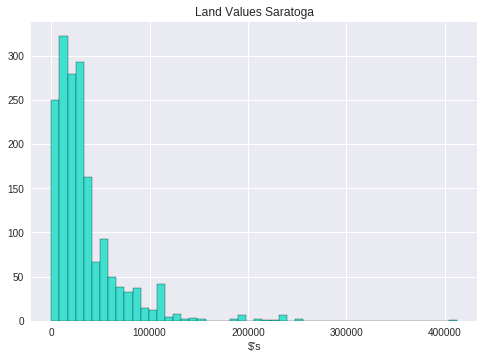

In [ ]:
plt.hist(data["Land.Value"],bins = 50,ec = "black",color = "turquoise")
plt.title("Land Values Saratoga")
ax = plt.xlabel("$'s")

In [ ]:
data["Land.Value"].skew()

3.1018863677881323

In [ ]:
data["Land.Value"].kurt()

16.231308974908533

The land value data is again skewed and running a skew test, a value of 3 is quite high. The kurtosis is also very high, indicating a non-normal distribution with significant outlier values.

## 4.6 New Construction

In [ ]:
data["New.Construct"].value_counts()

0    1653
1      81
Name: New.Construct, dtype: int64

In [ ]:
print(data[data["New.Construct"] == 1]["Price"].mean())
print(data[data["New.Construct"] == 0]["Price"].mean())

282306.81481481483
208077.59951603145


New builds are valued around $70,000 more than houses not identified as New Construction.

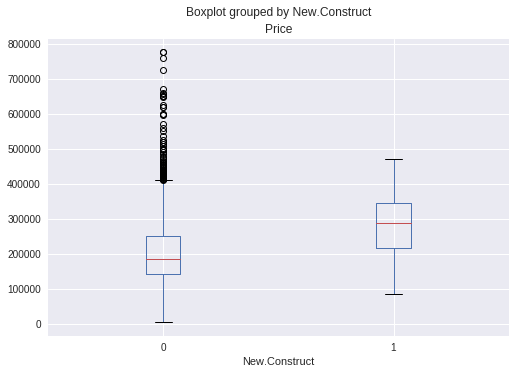

In [ ]:
ax = data.boxplot(by = "New.Construct",column = ["Price"])

In [ ]:
data["New.Construct"] = data["New.Construct"].astype("category")

Most properties are older with around 5% new builds, indicating this is an established area.  The median house price for new builds is higher than older properties but older construction homes vary more in price and there are many outliers.

## 4.7 Central Air, Fuel Type, Heating and Sewer Type

In [ ]:
data["Central.Air"].value_counts()

0    1099
1     635
Name: Central.Air, dtype: int64

In [ ]:
print(data[data["Central.Air"] == 1]["Price"].mean())
print(data[data["Central.Air"] == 0]["Price"].mean())

254903.77795275592
186492.47042766152


In [ ]:
data["Central.Air"] = data["Central.Air"].astype("category")

The mean price of homes with central air conditioning is almost 70,000 dollars more than the mean for homes without, indicating this might be a premium fitting.

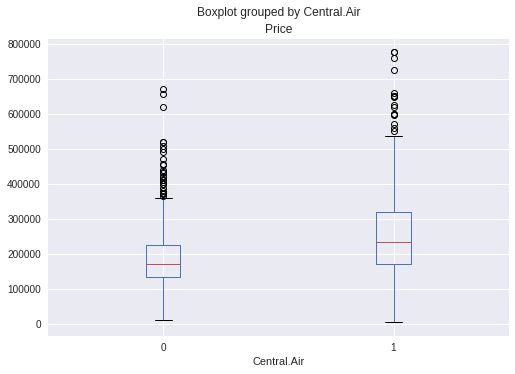

In [ ]:
ax = data.boxplot(by = "Central.Air",column = ["Price"])

The median price of homes with Central air is greater than those without. Both have outliers.

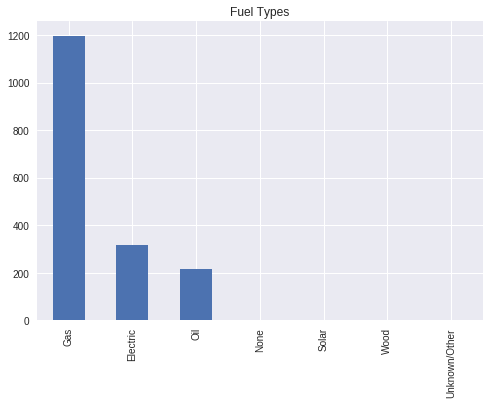

In [ ]:
ax = data["Fuel.Type"].value_counts().plot(kind = "bar",title = "Fuel Types")

In [ ]:
pie1 = data["Fuel.Type"].value_counts()
pie1

Gas              1197
Electric          315
Oil               216
None                3
Solar               1
Wood                1
Unknown/Other       1
Name: Fuel.Type, dtype: int64

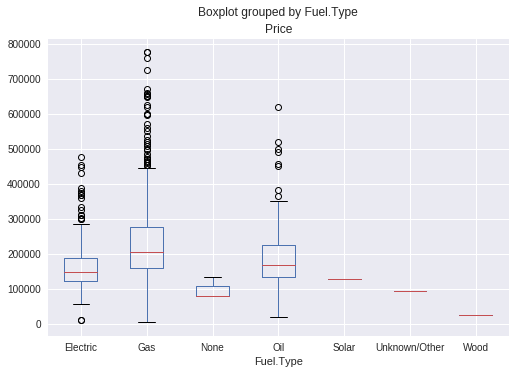

In [ ]:
ax = data.boxplot(by = "Fuel.Type",column = ["Price"])

Most homes have gas,electric or oil. There are a few unknown values, those with no fuel listed as well as wood and solar fuel types. 

The unknown/other value is not removed since it is only one value, it is not clear whether it is indeed unknown or actually another fuel type.

In [ ]:
data["Heat.Type"].value_counts()

Hot Air      1121
Electric      305
Hot Water     302
None            6
Name: Heat.Type, dtype: int64

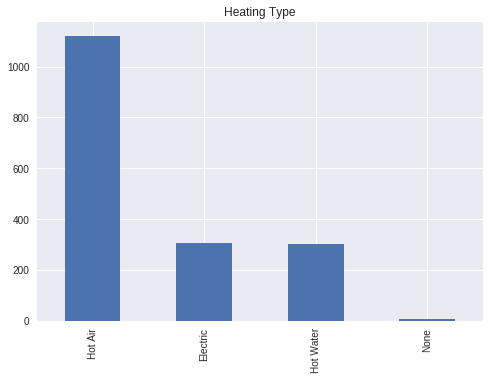

In [ ]:
ax = data["Heat.Type"].value_counts().plot(kind = "bar",title = "Heating Type")

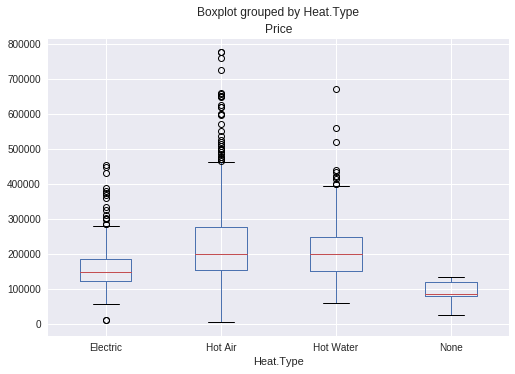

In [ ]:
ax = data.boxplot(by = "Heat.Type",column = ["Price"])

Most of the homes are heated with hot air. 

In [ ]:
data["Sewer.Type"].value_counts()

Public          1215
Private          507
None/Unknown      12
Name: Sewer.Type, dtype: int64

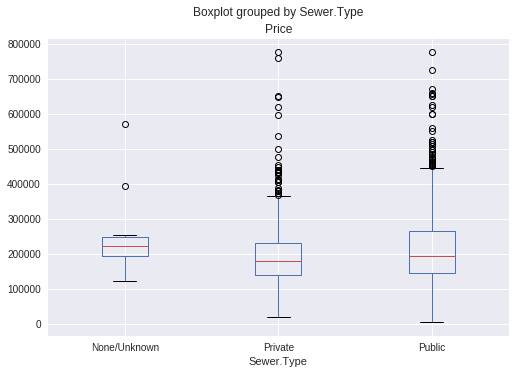

In [ ]:
ax = data.boxplot(by = "Sewer.Type",column = ["Price"])

## 4.8 Living Area

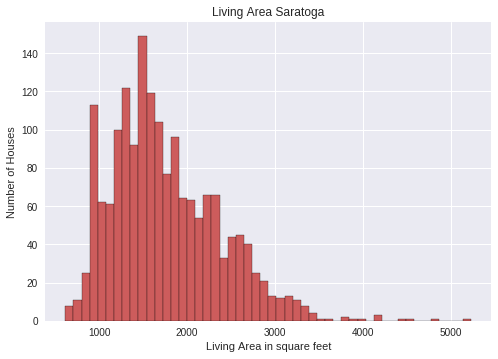

In [ ]:
plt.figsize=(4,2)
plt.hist(data["Living.Area"],bins = 50,ec = "black",color = "indianred")
plt.xlabel("Living Area in square feet")
plt.title("Living Area Saratoga")
ax = plt.ylabel("Number of Houses")

In [ ]:
data["Living.Area"].skew()

0.9043285316331217

This variable is assumed to be in square feet. The average of 1752 is higher than the median, with some larger living areas, so the histogram appears positively skewed.

## 4.9 Percent College Educated

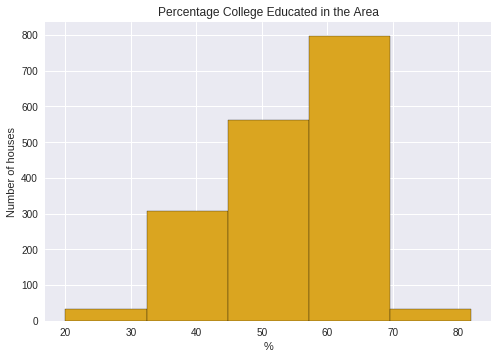

In [ ]:
data["Pct.College"].hist(bins = 5,ec = "black",color = "goldenrod")
plt.title("Percentage College Educated in the Area")
plt.xlabel("%")
ax = plt.ylabel("Number of houses")

In [ ]:
data["Pct.College"].skew()

-1.040057835673908

The percentage of college educated is quite interesting. As a whole the dataset mostly homes where the area in which it sits has a percentage of people college educated of around 50 to 75%. Very few areas have 70% or more or 30% or less. This might suggest the data is drawn from a predominantly middle-class area.

## 4.10 Number of Bedrooms

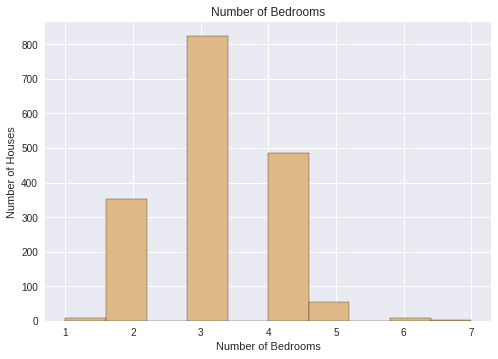

In [ ]:
plt.figsize=(4,2)
plt.hist(data["Bedrooms"],ec = "black",color = "burlywood")
plt.title("Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
ax = plt.ylabel("Number of Houses")

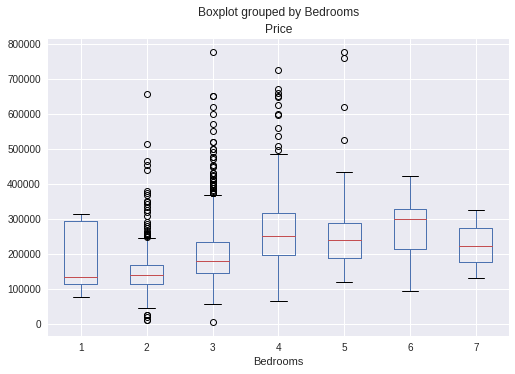

In [ ]:
ax = data.boxplot(by = "Bedrooms",column = ["Price"])

Most properties have 3 bedrooms and the mean price appears to increase with more bedrooms up to 6. Beyond that, the mean price falls.

## 4.11 Fireplaces

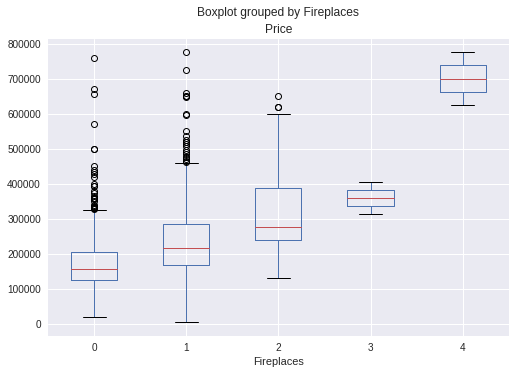

In [ ]:
ax = data.boxplot(by = "Fireplaces",column = ["Price"])

The boxplot shows quite an interesting finding, that the properties with a higher number of fireplaces have a higher mean price and a large jump up at 4. This was the subject of the original study.

## 4.12 Bathrooms and Total Rooms

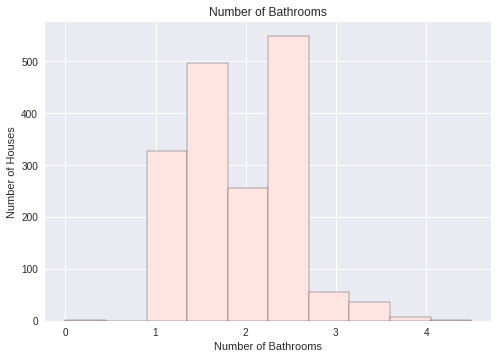

In [ ]:
plt.figsize=(4,2)
plt.hist(data["Bathrooms"],ec = "black",color = "mistyrose")
plt.title("Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
ax = plt.ylabel("Number of Houses")

In [ ]:
data["Bathrooms"].mode()

0    2.5
dtype: float64

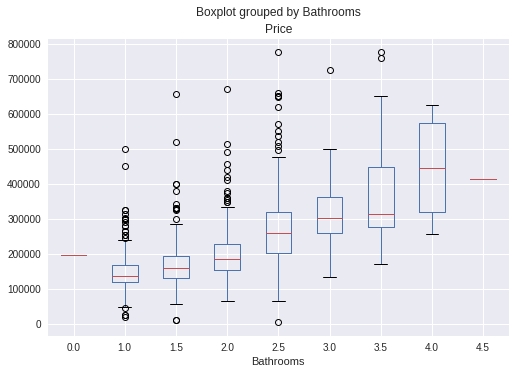

In [ ]:
ax = data.boxplot(by = "Bathrooms",column = ["Price"])

The most common number of bathrooms is 2.5, with the 0.5 values corresponding to rooms that containing a washstand and toilet rather being a full bathroom. The mean value of 1.89 isn't really a useful metric but the median price appears to increase with more bathrooms as shown in the boxplot.

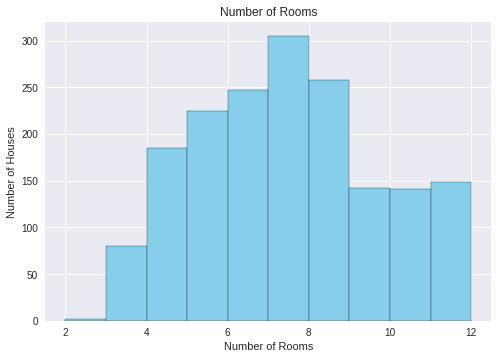

In [ ]:
plt.figsize=(4,2)
plt.hist(data["Rooms"],ec = "black",color = "skyblue")
plt.title("Number of Rooms")
plt.xlabel("Number of Rooms")
ax = plt.ylabel("Number of Houses")

In [ ]:
data["Rooms"].mode()

0    7
dtype: int64

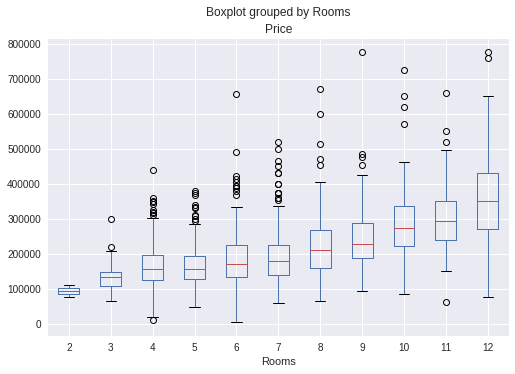

In [ ]:
ax = data.boxplot(by = "Rooms",column = ["Price"])

Most homes have 7 rooms. The mean, median number of rooms is also 7 so this is quite well distributed. The average price increases as the number of rooms increases as shown by the boxplot.

## 4.13 Summary

The variable plots have been examined in some depth, looking at the distributions, whether or not there might be outliers, missing or odd values. Relationships between price and some of the variables have been identified but the following section considers these more carefully using correlations and scatter plots. The purpose of this is to identify those variables or features most related to the price of a property before moving on to look at correlations.

# 5.0 Relationships Between the Variables

## 5.1 Pairplots

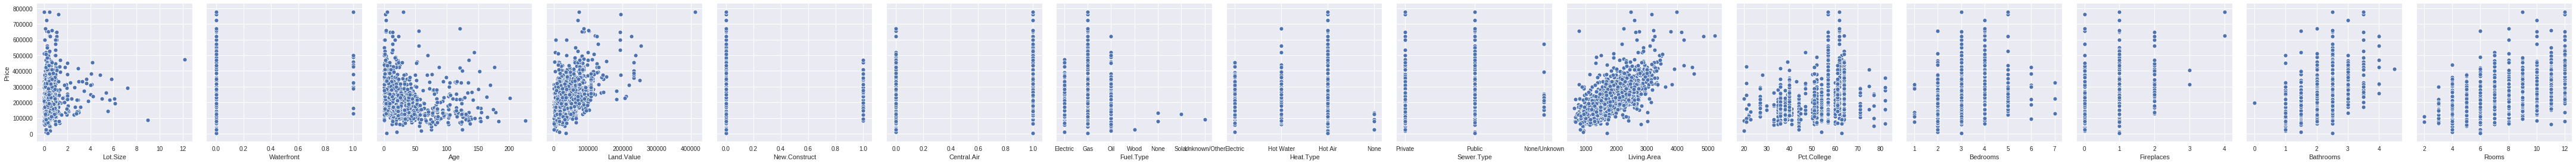

In [ ]:
features = list(data.columns)[1:]
sns.pairplot(data,  x_vars=features, y_vars="Price", kind='scatter', height =4)
plt.show()

**Scatter Plots**

The scatter plots produced by the pairplot function are very interesting. Looking at the continuous variables:

*Lot Size*

There doesn't seem to be much of a linear relationship between lot size and price that may seem counterintuitive as we might expect larger lots to sell for more. In fact, there are some very small lot sizes associated with very low values and very high values, indicating high priced apartments in more desirable areas and lower priced flats in less desirable areas. There is a cluster of properities around the mid range in size and price and a couple of much larger but lower value properties, perhaps in a more rural area.

*Age*

There appears to a weak negative relationship between age of property and price. Properties over 100 years old, with the exception of two were priced at 500,000 or less with the highest value houses found up to about 30 to 35 years old. Most homes appear to be under 400,000. There may be some curvature showing in this plot, suggesting a non-linear model may be more appropriate.

*Land Value*

Most homes are 100,000 or less, with a scattering of properties over this. There does appear to be a postive linear relationship with price which is not surprising.

*Living Area*

There appears to be a very strong postivie relationship between price and living area, which is again expected.

*Percentage College Educated*

It is difficult to tell from the plot but there may be a weak postive linear relationship.

*Categorical variables*

It is more difficult to derive insights from the categorical variables much beyond what was identified in the previous section but there do appear to be some positive relationships between price and the number of rooms and bathrooms.



## 5.2 Regression Plots

Adding a regression line to the scatter plots for numerical variables, helps to show up any trends.

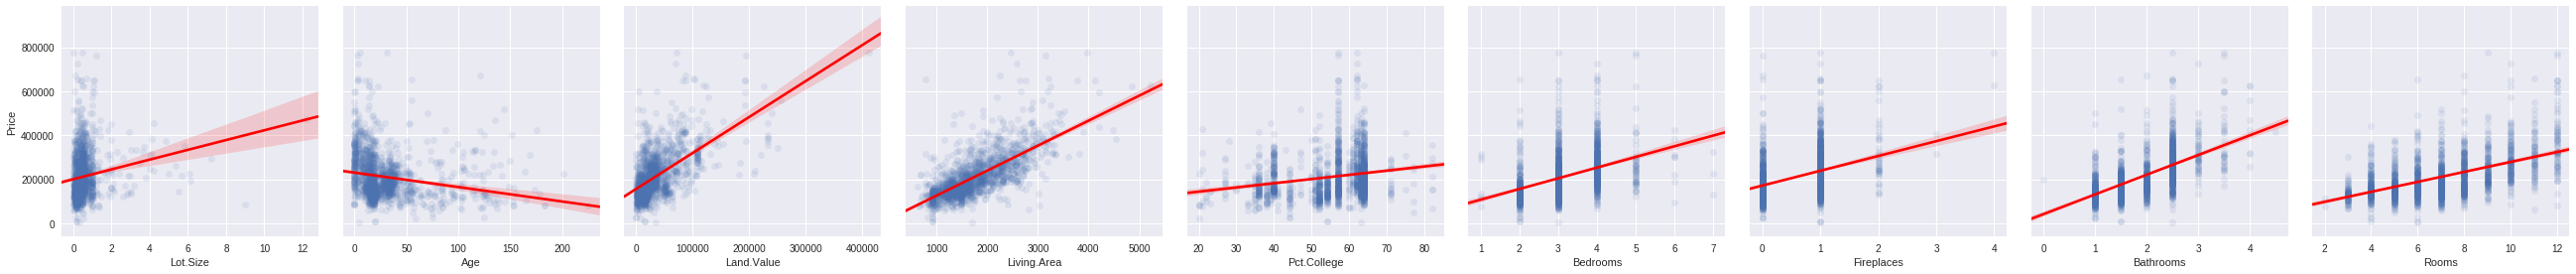

In [ ]:
features1 = data[["Lot.Size","Age","Land.Value","Living.Area","Pct.College","Bedrooms","Fireplaces","Bathrooms","Rooms"]]
features1 = list(features1.columns)
ax = sns.pairplot(data, x_vars=features1, y_vars="Price",kind = 'reg',height = 4,plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})        

**Regression Plots** 
Adding regression lines to the plots helps to highlight the relationships between each variable and the response further.

## 5.3 Converting Strings to Numerical

The categorical variables with string values need to be converted to numerical values in order to be included in the regression model.

In [ ]:
def heat_to_numeric(x):
    if x=='Hot Air':
        return 1
    if x== 'Electric':
        return 2
    if x=='Hot Water':
        return 3
    if x == 'None':
        return 4
data['Heat.Type'] = data['Heat.Type'].apply(heat_to_numeric)

In [ ]:
def fuel_to_numeric(x):
    if x== 'Gas':
      return 1
    if x=='Electric':
      return 2
    if x=='Oil':
      return 3
    if x=='None':
      return 4
    else:
      return 5
      
data['Fuel.Type'] = data['Fuel.Type'].apply(fuel_to_numeric)

In [ ]:
def sewer_to_numeric(x):
    if x=='Public':
        return 1
    if x=='Private':
        return 2
    if x== 'None/Unknown':
        return 3
data['Sewer.Type'] = data['Sewer.Type'].apply(sewer_to_numeric)

## 5.4 Correlation Matrix

Calculating correlation coefficients shows the strength and direction of relationships between the variables.

In [ ]:
# Pearson Correlation Coefficient
correlation_matrix = data.corr()
correlation_matrix

,Price,Lot.Size,Age,Land.Value,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
Price,1.000000,0.157383,-0.198656,0.580673,-0.218587,-0.139905,-0.065041,0.713485,0.199814,0.402508,0.379561,0.597736,0.533325
Lot.Size,0.157383,1.000000,-0.012119,0.058461,0.214094,0.064051,0.357969,0.163426,-0.032858,0.113892,0.084841,0.084744,0.137136
Age,-0.198656,-0.012119,1.000000,-0.024683,0.236197,0.265530,0.081260,-0.181729,-0.037285,0.014511,-0.180132,-0.361718,-0.093739
Land.Value,0.580673,0.058461,-0.024683,1.000000,-0.197540,-0.082223,-0.153209,0.422852,0.228768,0.202290,0.211822,0.297296,0.298602
Fuel.Type,-0.218587,0.214094,0.236197,-0.197540,1.000000,0.240955,0.348713,-0.216198,-0.204617,-0.169534,-0.183739,-0.262579,-0.168246
Heat.Type,-0.139905,0.064051,0.265530,-0.082223,0.240955,1.000000,0.023329,-0.070740,-0.030156,0.037150,-0.050115,-0.094650,-0.041770
Sewer.Type,-0.065041,0.357969,0.081260,-0.153209,0.348713,0.023329,1.000000,-0.033033,-0.220292,0.037754,-0.066441,-0.111630,0.000445
Living.Area,0.713485,0.163426,-0.181729,0.422852,-0.216198,-0.070740,-0.033033,1.000000,0.209657,0.657337,0.475869,0.718798,0.734790
Pct.College,0.199814,-0.032858,-0.037285,0.228768,-0.204617,-0.030156,-0.220292,0.209657,1.000000,0.162935,0.245900,0.179825,0.156700
Bedrooms,0.402508,0.113892,0.014511,0.202290,-0.169534,0.037150,0.037754,0.657337,0.162935,1.000000,0.286990,0.459973,0.673131


## 5.5 Heat Map

A heatmap makes the results easier to look at.

In [ ]:
mask = np.zeros_like(data.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

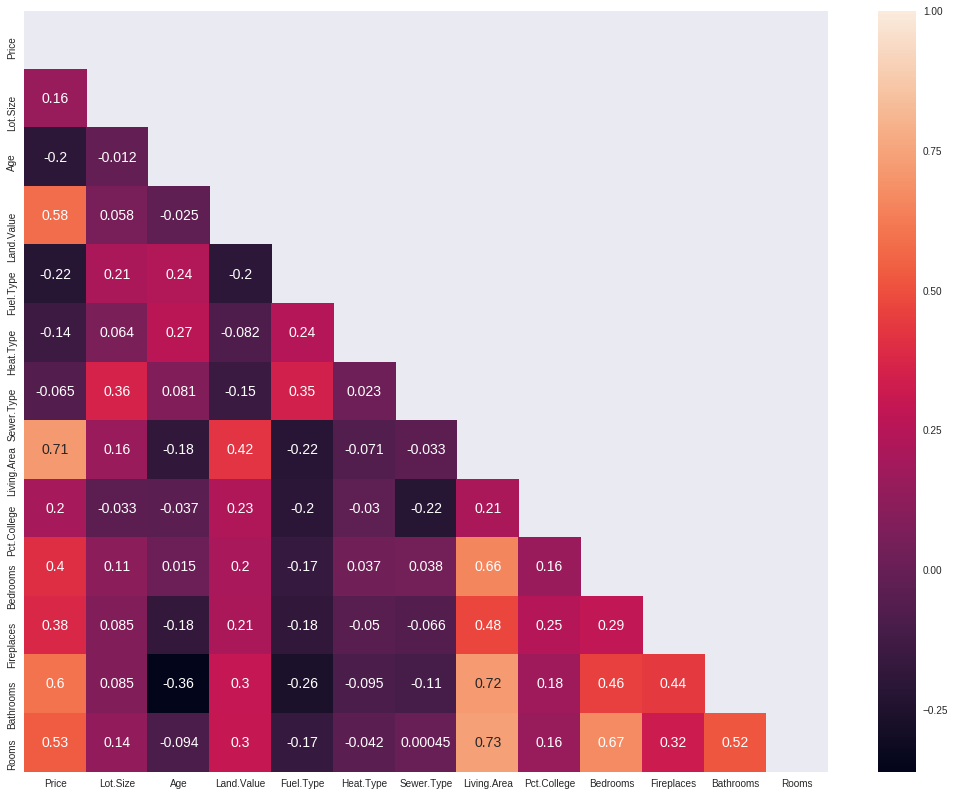

In [ ]:
fig, ax = plt.subplots(figsize=(18,14))      
sns.heatmap(data.corr(),mask = mask,annot = True,annot_kws={'size':14})
plt.show()

There are quite high positive correlations between both land value and living area with price. These are continuous variables so the coefficients make sense. There is also a small negative correlation between age of property and the price. Also of interest is the low correlation between lot size and price and the negative correlation with Age.

Care should be taken when inferring relationships with discrete variables as there is an assumption the data is normally distributed. Some research suggests that discrete variables shouldn't be included but the discrete variables shown in the table are ordered so are considered. There are quite high correlations between the number of rooms,bathrooms and bedrooms and price but also between living area and bedrooms, bathrooms and total rooms suggesting that there will be multicollinearity.

The multi-level categorical variables coefficients such as for heat-type and fuel-type provide little useful information. The categories have been numbered but there is no inherent order in the variables.




# 6.0 Dealing With Categorical Variables 

An easier way to look at the categorical data is to use a scatter plot showing two continuous variables such as the price and living area and then adding a third categorical variable as a colour. The binary and multi-level dummy variables can be examined this way. The plots provide some insights into the variables relationship with price and which ones might be relevant to the model that is built

## 6.1 Categorical Binary Variables

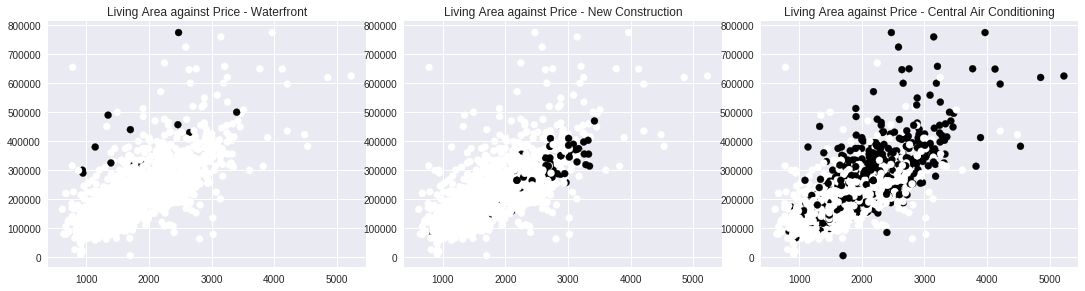

In [ ]:
plt.figure(figsize=(15,4))
for i in range (1, 4):
   plt.subplot(1,3,i)
   plt.tight_layout()
   
plt.subplot(1,3,1)
plt.scatter(data["Living.Area"],data["Price"],c = data["Waterfront"])
plt.title("Living Area against Price - Waterfront")

plt.subplot(1,3,2)
plt.scatter(data["Living.Area"],data["Price"],c = data["New.Construct"])
plt.title("Living Area against Price - New Construction")

plt.subplot(1,3,3)
plt.scatter(data["Living.Area"],data["Price"],c = data["Central.Air"])
ax = plt.title("Living Area against Price - Central Air Conditioning")

From the plots, Waterfront properties are priced from around 300,000 upwards with none at the lower price levels.

New Construction Houses are mostly those with above 2000 square feet living area but clustered around the 250,000 to 500,000 price mark.

The highest priced and largest homes predominantly have Central Air Conditioning but it is found in a wide range of sized and priced homes also.

## 6.2 Categorical Multi Level Variables

### 6.2.1 Heating

In [ ]:
# Dummy encode without dropping any variables for graph plotting
cat_df = pd.get_dummies(data, columns=['Waterfront','New.Construct','Central.Air','Heat.Type','Fuel.Type','Sewer.Type'])

In [ ]:
cat_df

,Price,Lot.Size,Age,Land.Value,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Waterfront_0,Waterfront_1,New.Construct_0,New.Construct_1,Central.Air_0,Central.Air_1,Heat.Type_1,Heat.Type_2,Heat.Type_3,Heat.Type_4,Fuel.Type_1,Fuel.Type_2,Fuel.Type_3,Fuel.Type_4,Fuel.Type_5,Sewer.Type_1,Sewer.Type_2,Sewer.Type_3
0,132500,0.09,42,50000,906,35,2,1,1.0,5,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
4,86060,0.11,0,15000,840,51,2,0,1.0,3,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,134700,0.17,93,55800,1002,57,2,0,1.0,4,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1730,127100,0.10,124,49500,934,57,2,0,1.5,4,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
1731,93125,0.16,59,32000,1152,63,3,0,2.0,5,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1732,80100,1.29,183,16500,1280,57,3,0,2.0,5,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


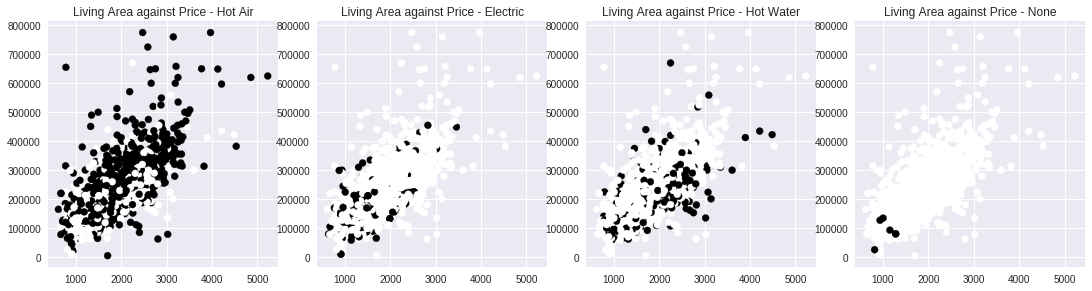

In [ ]:
plt.figure(figsize=(15,4))
for i in range (1, 4):
   plt.subplot(1,4,i)
   plt.tight_layout()
   
plt.subplot(1,4,1)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Heat.Type_1"])
plt.title("Living Area against Price - Hot Air")

plt.subplot(1,4,2)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Heat.Type_2"])
plt.title("Living Area against Price - Electric")

plt.subplot(1,4,3)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Heat.Type_3"])
plt.title("Living Area against Price - Hot Water")

plt.subplot(1,4,4)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Heat.Type_4"] )
ax = plt.title("Living Area against Price - None")

Electric Heating is found mostly in lower priced housing. Hot Air is the predominant form of heating in higher priced larger homes. Hot Water heating systems are not common in the higher value properties and are mostly found in mid range priced housing.

### 6.2.2 Fuel Type

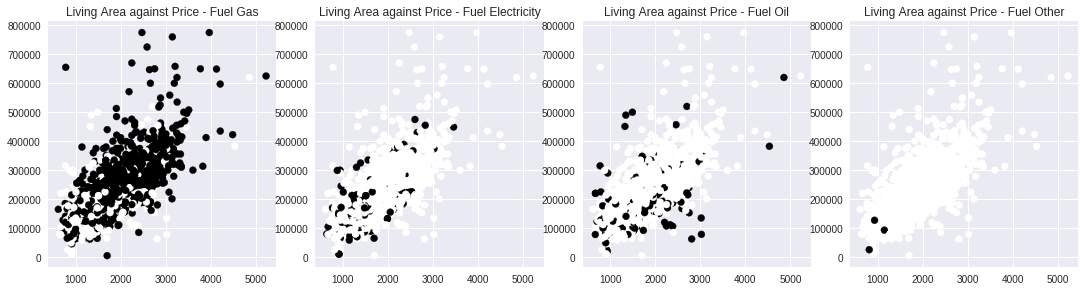

In [ ]:
plt.figure(figsize=(15,4))
for i in range (1, 5):
   plt.subplot(1,4,i)
   plt.tight_layout()
   
plt.subplot(1,4,1)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Fuel.Type_1"])
plt.title("Living Area against Price - Fuel Gas")

plt.subplot(1,4,2)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Fuel.Type_2"])
plt.title("Living Area against Price - Fuel Electricity")

plt.subplot(1,4,3)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Fuel.Type_3"])
ax = plt.title("Living Area against Price - Fuel Oil")

plt.subplot(1,4,4)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Fuel.Type_5"])
ax = plt.title("Living Area against Price - Fuel Other")

Gas is the most used Fuel type at all price levels and higher priced homes predominantly use gas. Electricity and oil are mostly found in lower priced smaller homes as are the other fuel types - wood, solar etc.

### 6.2.3 Sewer Type

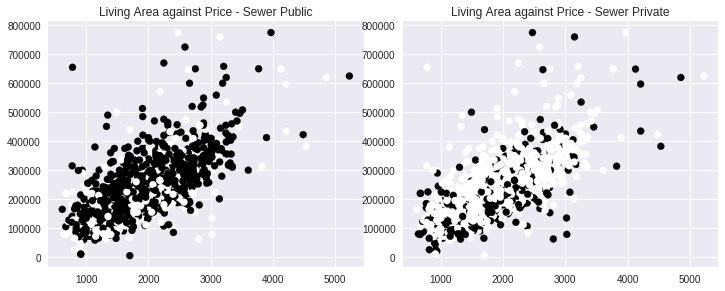

In [ ]:
plt.figure(figsize=(10,4))
for i in range (1, 3):
   plt.subplot(1,2,i)
   plt.tight_layout()
   
plt.subplot(1,2,1)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Sewer.Type_1"])
ax = plt.title("Living Area against Price - Sewer Public")

plt.subplot(1,2,2)
plt.scatter(data["Living.Area"],data["Price"],c = cat_df["Sewer.Type_2"])
ax = plt.title("Living Area against Price - Sewer Private")


The plots for the type of sewer system do not provide a lot of information with a mix of both types at all ranges of price and size of property.

## 6.3 Dummy Variable Encoding

Several categorical variables have been identified within the dataset. Some of them are binary coded as '0' or '1' such as whether the property is on the waterfront or not but a few have more than two categories such as Heat Type and Fuel Type. 

In order to deal with these properly, they need to be dummy encoded. 
Dummy variables are useful as a single regression equation can be used to represent many groups. Otherwise, there would need to be separate equations for each item in a group. For example, new construction buildings. Both can be included in one equation rather than having two equations - one for new construction and one for old. Using dummy variables is like having an 'on and off' switch for a parameter.

The string values have already been converted to numbers. Dummy encoding results in n-1 categories for each feature encoded - to avoid the Dummy Trap one of the categories for each feature must be dropped and is treated as the base or comparison case.

In [ ]:
data = pd.get_dummies(data, columns=['Waterfront','New.Construct','Central.Air','Heat.Type','Fuel.Type','Sewer.Type'],drop_first=True)

In [ ]:
data.head(1)

,Price,Lot.Size,Age,Land.Value,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Waterfront_1,New.Construct_1,Central.Air_1,Heat.Type_2,Heat.Type_3,Heat.Type_4,Fuel.Type_2,Fuel.Type_3,Fuel.Type_4,Fuel.Type_5,Sewer.Type_2,Sewer.Type_3
0,132500,0.09,42,50000,906,35,2,1,1.0,5,0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
data.shape

(1734, 22)

In [ ]:
data.columns = ['Price', 'Lot.Size', 'Age', 'Land.Value', 'Living.Area',
                'Pct.College', 'Bedrooms', 'Fireplaces','Bathrooms', 'Rooms', 'Waterfront','New.Construct',
                'Central.Air','Heat_electric','Heat_hotwater','Heat_none','Fuel_elec','Fuel_oil','Fuel_none',
                'Fuel_other','Sewer_priv','Sewer_none',]
                

# 7.0 Building a Mulitple Linear Regression Model

## 7.1 Base Model

The intital model includes all the explanatory variables.

In [ ]:
price = data["Price"]
X = data.drop(["Price"],axis = 1)

In [ ]:
X_constant = sm.add_constant(X)

In [ ]:
model_1 = sm.OLS(price,X_constant.astype(float)).fit()

In [ ]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     162.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:14:55   Log-Likelihood:                -21475.
No. Observations:                1734   AIC:                         4.299e+04
Df Residuals:                    1713   BIC:                         4.311e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.396e+04   1.03e+04      2.317

## 7.2 Regression Coefficients

The coefficients and the respective p-values summarised in a table and sorted from smallest p-value to largest, helps to identify the key variables in the model.

In [ ]:
# Sorting p-values to identify those that are significant
units = ["","Acres","yrs","$","sq ft","%","No.","No.","No.","No.","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N"]
model_1_coeff = pd.DataFrame({"unit":units,'coef':model_1.params,'p-values': round(model_1.pvalues,3)})
model_1_coeff[1:].sort_values(by = "p-values")

,unit,coef,p-values
New.Construct,Y/N,-45513.040043,0.000
Waterfront,Y/N,120099.910773,0.000
Land.Value,$,0.923139,0.000
Living.Area,sq ft,69.999377,0.000
Bathrooms,No.,23007.766521,0.000
Lot.Size,Acres,7585.036217,0.001
Rooms,No.,3024.756920,0.002
Bedrooms,No.,-7868.685865,0.002
Central.Air,Y/N,9924.680632,0.004
Heat_hotwater,Y/N,-10422.964814,0.013


## 7.3 Regression Summary

The R square and adjusted R squared for the model is 0.65 so we can say that 65% of the variation in price is explained by the independent variables in the model. The remaining 35% is explained by other factors not in the model. 

*Note: The adjusted R squared is the preferred metric in multi-regression as R squared will always increase when an additional term is added, even if the model is no better and has no greater predictive ability, whilst the adjusted R squared penalises each term added to the model, balancing having a good model and avoiding having too much complexity with too many predictors that do not add anything.*

The F-statistic is large and the corresponding p-value is rounded to zero,so the alternative hypothesis is accepted, the test is significant - that the model with all the independent variables fits the data better than one based on the intercept only. 

Looking at the model's coefficients, many variables have a positive effect on house prices, in particular the size of the lot, a waterfront location and the number of bathrooms. See the table above. Increased age of the property, a newer construction, the number of bedrooms and non traditional fuel types have a negative effects on price based on the coefficients. 

**Interpreting the coefficients**

*For example, Living Area coefficient of 69.9994 means that for each square foot of area, the price increases by 70 dollars on average assuming all other variables remain constant.*

The hypothesis that the true coefficient (β) for the corresponding variable is zero is measured by the t-test and associated p-value. Many of the variables have very small p-values below 0.05 and therefore are significant. Variables for which the null hypothesis of significance fails to be rejected include all the heating, fuel and sewer variables as well as the number of fireplaces and the percentage of households in the area attending college. These variables are not significant to the model but are not removed at this point since there may be effects and dependencies on other variables. They will be addressed during model selection.

[When to leave insignificant effects in a model](https://www.theanalysisfactor.com/insignificant-effects-in-model/)



## 7.4 Multicollinearity

The correlation matrix and heat map in sections 5.4 and 5.5 seem to suggest there might be multicollinearity (independent variables are highly correlated) amongst some of the variables. For example, the number of rooms and bedrooms are highly correlated with living area and also with total rooms. The total rooms and living space are expected to increase with the number of bedrooms and bathrooms.

An **example**

The regression equation shows the coefficient for bedrooms as negative and signficant, which seems counterintuitive. More bedrooms should be related to a higher price. This is probably because of its relationship with living area. In a bigger home, more bedrooms would probably result in a higher price but for a smaller home, it would follow that each of the rooms was quite small. This suggests that there are two different relationships with price for the bedroom variable.

Muticollinearity can be a problem as variables related to each other can affect the performance of the model. With each variable as a predictior in a model, if they themselves are correlated, they are both explaining the same part of the variation in the response and the model can struggle to isolate the effects of each variable. The coefficients may remain unbiased, the variance can be inflated, p-values high and therefore not significant.

These variables can be ignored if they are not the focus of the investigation, combined into one category or removed. The Variance Inflation Factor was determined to measure the collinearity among the variables.


In [ ]:
# VIF sorted to bring variables of concern to the top of the table
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_constant.astype(float).values, i) for i in range(X_constant.shape[1])]
vif["features"] = X_constant.columns
vif[1:].sort_values(by = "VIF Factor",ascending = False)

,VIF Factor,features
18,inf,Fuel_none
15,inf,Heat_none
19,inf,Fuel_other
13,11.239626,Heat_electric
16,11.183578,Fuel_elec
4,4.178358,Living.Area
9,2.538467,Rooms
8,2.504243,Bathrooms
6,2.247742,Bedrooms
2,1.537379,Age


Looking at the table, a VIF of 1.4 for Fireplaces says that the variance of the coefficient is 40% greater than would be expected if there was no multicollinearity with other features. A common reference point is that:

*  1 is not correlated.
*  1 to 5 is moderately correlated
*  greater than 5 = highly correlated.

Most of the factors are below 5, with the exception of a number of high values for Heating and Fuel Type. These are for those categorical variables with more than two levels, which according to the following reference will not affect the model. 

"*there are several situations in which multicollinearity can be safely ignored. The variables with high VIFs are indicator (dummy) variables that represent a categorical variable with three or more categories..it does mean that p-values for the indicator variables may be high but the overall test that all indicators have coefficients of zero is unaffected by the high VIFs.And nothing else in the regression is affected.* 

[When can you safely ignore multicollinearity](https://statisticalhorizons.com/multicollinearity)

The rooms, bedrooms and bathrooms have VIF of around 2.2 to 2.5 and living area has a VIF over 4. These variables are logically correlated so the model was run again below removing Living Area to see if there is any effect on the model.

## 7.5 Remove Living Area From the Model

In [ ]:
price = data["Price"]
X2 = data.drop(["Price"],axis = 1)

In [ ]:
X2 = X2.drop(["Living.Area"],axis = 1)
X2_constant = sm.add_constant(X2)
model_1_test = sm.OLS(price,X2_constant.astype(float)).fit()
print(model_1_test.rsquared)

0.6087967482018892


Removing the Living Area seems to reduced the R squared value, which would suggest that it does not improve the explanatory power of the model,so it is not removed at this stage.

# 8.0 Base Model Residual Analysis

## 8.1 Summary Plot

The difference between the predicted values and the actual values should be randomly distributed. If there are any patterns in the residuals, there is still predictive information remaining in the data not available to the model.

In [ ]:
residuals1 = model_1.resid
predicted1 = model_1.fittedvalues

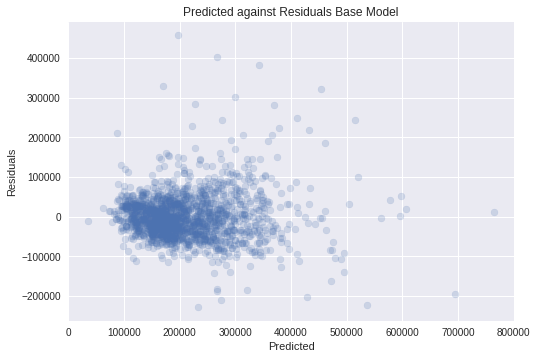

In [ ]:
plt.scatter(predicted1,residuals1,alpha = 0.2)
plt.title("Predicted against Residuals Base Model")
plt.xlabel("Predicted")
resid_plot1 = plt.ylabel("Residuals")

The plot of residuals against predicted values does not appear to show any patterns. There are some homes with large residuals above and below.

## 8.2 Individual Residual Plots

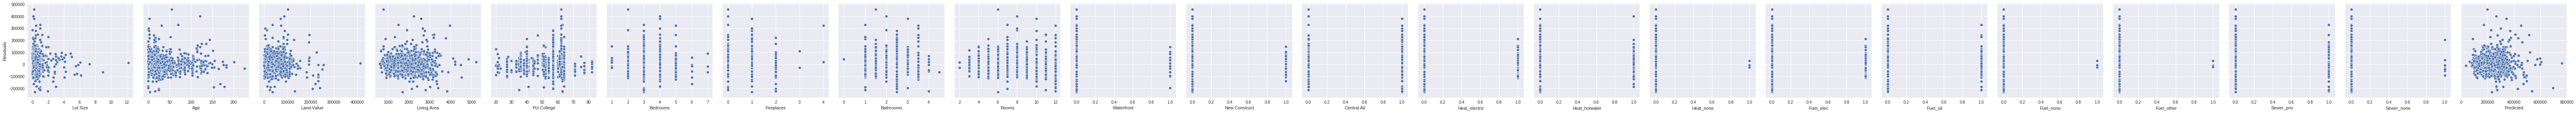

In [ ]:
model = X.copy()
model['Predicted'] = predicted1
model['Residuals'] = residuals1
x_vars = list(model.columns)[:-1]
x_vars

sns.pairplot(data=model,  x_vars=x_vars, y_vars='Residuals', kind='scatter', height =4)
plt.show()

## 8.3 Linearity

There should a linear relationship between the dependent variable price and each independent x variables. Non-linearity means that the coefficients and standard errors may be unreliable. 

The residual plots do not appear to show any obvious curvature, although there may be some issues with the age plot and those for bedrooms and bathrooms.

## 8.4 Independence 

The errors of the model should be independent of one another. This is generally an issue for time series data where serial correlation between ordered data can be an issue. As the data was randomly collected it is assumed this condition is met. 


## 8.5 Normality

Residuals should be normally distributed.

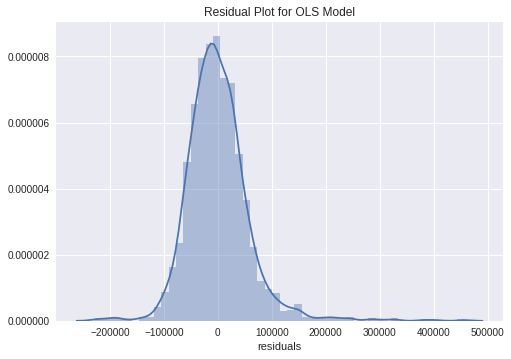

In [ ]:
sns.distplot(residuals1)
plt.xlabel('residuals')
plt.title("Residual Plot for OLS Model")
plt.show()

In [ ]:
residuals1.skew()

1.3996357898126464

The histogram of the residuals is unimodal and fairly symmetrical about zero but has a long right tail, representing a positive skew with some outlier points (discussed below).

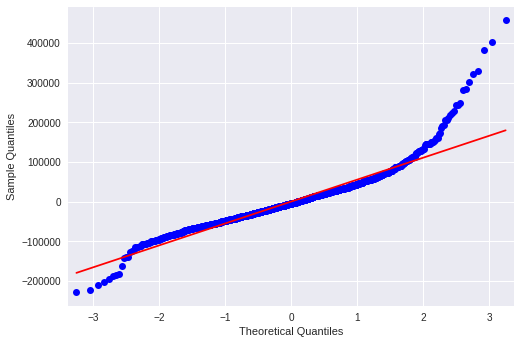

In [ ]:
sm.qqplot(residuals1,line ='r')
plt.show()

The qq plot has some problems at the tails and does not apear normally distributed. 

In [ ]:
# Shapiro Wilks
from scipy.stats import shapiro
statistic, p = shapiro(residuals1)
print('Statistics=%.3f, p=%.3f' % (statistic, p))
alpha = 0.05
if p > alpha:
	print('Appears Normally distributed (fail to reject H0)')
else:
	print('Does not Appear Normally Distributed (reject H0)')

Statistics=0.912, p=0.000
Does not Appear Normally Distributed (reject H0)


In [ ]:
#Jacques Bera Test
sm.stats.stattools.jarque_bera(residuals1, axis=0)

(4883.745519502278, 0.0, 1.3984247411558972, 10.731282343106187)

In [ ]:
sm.stats.diagnostic.normal_ad(residuals1, axis=0)

(20.83687104922842, 0.0)

The errors are assumed to be from a Normal Distribution with unknown mean and variance. Normality is required for calculation of prediction intervals.

Statistical tests fail to accept the null hypothesis -  the residuals are not normally distributed. 

**Is the Non-normality a problem?**

With a large sample size failure to meet the normality assumption does not rule out a model, although it confidence and prediction intervals may be affected. A rule of thumb used by some statisticians is that if the number of parameters squared divided by the sample size should be small, in this case (22 x 22)/1734 = 0.28. Further analysis of outliers is considered in the next section.

[Source: #9 and #11](https://www.statalist.org/forums/forum/general-stata-discussion/general/1413967-is-it-acceptable-to-log-transform-an-independent-variable-even-if-the-residuals-of-the-non-transformed-model-are-normal)

## 8.6 Outlier Investigation

Outliers in the data can affect the model quality by affecting the model parameters. From the plots, the data appears to have a number of outlier values. To investigate these, statsmodels - Cook's distance and z-scores are used.

**Cooks Distance Plot**

This measures the effect of removing a datapoint and therefore the influence of that point. Residuals with large Cook's Distance could be potential outliers and shown on a plot.


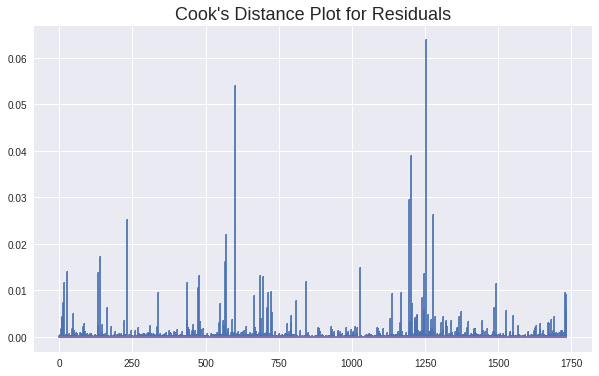

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence as outliers_influence
inf = outliers_influence(model_1)
(c,p) = inf.cooks_distance
plt.figure(figsize = (10,6))
plt.title("Cook's Distance Plot for Residuals", fontsize = (18))
ax = plt.stem(np.arange(len(c)),c,markerfmt = ",")

There are a couple of points worth looking at

In [ ]:
# Sort Cooks distance figures highest to lowest
c.sort_values(ascending = False).head(5)

1253    0.063761
601     0.054056
1201    0.039011
1194    0.029426
1278    0.026303
dtype: float64

In [ ]:
# Actual and predicted price for observation 1253
print(data.iloc[1253][0])
print(predicted1[1253])

571000.0
365069.0683650669


In [ ]:
# Actual and predicted price for observation 601
print(data.iloc[601][0])
print(predicted1[601])

500075.0
695125.2051621497


In [ ]:
# Actual and predicted price for observation 1201
print(data.iloc[1201][0])
print(predicted1[1201])

775000.0
452946.7859059712


**Z-Scores**

As an additional check, looking at the z-scores for house prices, there are 26 values above 3 standard deviations from the mean where we would expect 99.7% of values to lie. This suggests that there are plenty of outlier values and perhaps the issue might lie with the model. The absence of a location variable is a large oversight, given the known importance of this factor in house prices and whilst the sample is taken from one single area, it is clear that there are some significant variations in property prices and features across the dataset.

---



In [ ]:
score = pd.DataFrame(scipy.stats.zscore(data["Price"]), columns = ["Z-score"])
score[score['Z-score']>3].sort_values(by = "Z-score", ascending = False)

,Z-score
701,5.718881
1201,5.718881
570,5.566636
1206,5.211397
1278,4.653166
1245,4.534415
1194,4.500921
1238,4.450172
710,4.450172
611,4.440023


There are a number of values where the predicted price is well adrift from the actual price. Each of these datapoints were examined and all three were large properties with living area and number of rooms well above the mean. There is no locational information in the data other than whether properties are waterfront located, so these houses may be large homes in high-priced, well-located areas where the typical property is much smaller, thereby undermining the link between property size and price. Without domain knowledge it is unwise to remove datapoints, as it may remove valuable information. 

## 8.7 Homoscedascity

Residuals should be have similar variance across all values of the predictor variables. 

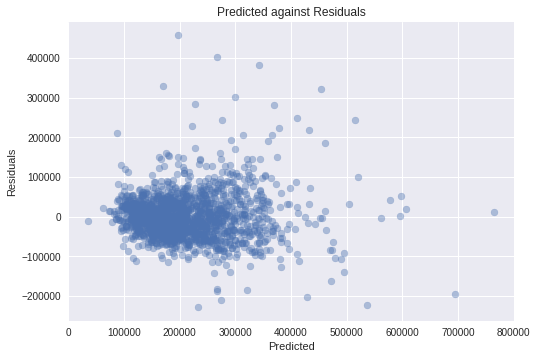

In [ ]:
plt.scatter(predicted1,residuals1,alpha = 0.4)
plt.title("Predicted against Residuals")
plt.xlabel("Predicted")
ax = plt.ylabel("Residuals")

The plot of predicted values against residuals should show that the points are randomly distributed or forming a horizontal band around zero. There is a ball of points at the lower price range with some scattered outlier points above and below zero. The variance may be reducing over the plot.


**Statistical Tests for Constant Variance**

In [ ]:
#Breusch pagan test for heteroscedascity ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
result_bp = sm.stats.diagnostic.het_breuschpagan(residuals1, model_1.model.exog)
print("Lagrange multiplier: ",result_bp[0])
print("p-value: ",result_bp[1])
print("f-value: ",result_bp[2])
print("f p-value: ",result_bp[3])

Lagrange multiplier:  121.06843582325057
p-value:  4.545922043828819e-16
f-value:  6.428984191622584
f p-value:  3.935857425723257e-17


With a lack of constant variance the coefficients will be unbiased but it will affect the reliability of standard errors and therefore the results of any hypothesis tests. 

The BreuschPagan test rejects the null hypothesis of constant variance. However, this test assumes normal distribution of errors and the normality assumption was not met.



# 9.0 Improving the Base Model - Backwise Selection 

## 9.1 Model Comparison Function

In [ ]:
X_constant = X_constant.drop(columns = ["const"])

In [ ]:
def model_comparing(y,X):
  comparing_models = pd.DataFrame(index = X.columns, columns=['Adj R-sqr', 'AIC'])
  for i in X.columns:
    X_with_c = sm.add_constant(X)
    house_price = sm.OLS(price, X_with_c.astype(float).drop(columns= i)).fit()
    row = {'Adj R-sqr': house_price.rsquared_adj ,'AIC': house_price.aic}
    comparing_models.loc[i] = row
  
  comparing_models.sort_values(by=['AIC'],inplace=True)
    
  return comparing_models

model_comparing(price,X_constant)

,Adj R-sqr,AIC
Heat_electric,0.65142,42989.6
Sewer_none,0.651411,42989.7
Fireplaces,0.651394,42989.8
Sewer_priv,0.651393,42989.8
Pct.College,0.651308,42990.2
Fuel_oil,0.651273,42990.4
Fuel_elec,0.651254,42990.5
Fuel_other,0.651216,42991.6
Fuel_none,0.651216,42991.6
Heat_none,0.651216,42991.6


## 9.2 Variable Selection

In [ ]:
best = model_comparing(price,X_constant.drop(columns = ["Heat_electric","Sewer_none","Fireplaces","Sewer_priv","Pct.College","Fuel_oil",
                                                        "Heat_none","Fuel_none"]))
best

,Adj R-sqr,AIC
Fuel_other,0.651925,42980.2
Heat_hotwater,0.651037,42984.6
Fuel_elec,0.650904,42985.3
Age,0.650704,42986.3
Central.Air,0.650584,42986.8
Bedrooms,0.650393,42987.8
Rooms,0.650225,42988.6
Lot.Size,0.649609,42991.7
New.Construct,0.64425,43018
Bathrooms,0.642479,43026.6


Removing one variable at a time and rerunning the function to obtain the result with the lowest AIC. The AIC is a goodness of fit measure which takes into account the number of parameters. This reduces complexity of the model.

It is interesting to note that several of the variables that were insignificant in the base model are included in the new best model.



## 9.3 Fitting Model 2

In [ ]:
X_constant = sm.add_constant(X)
model_2 = sm.OLS(price, X_constant.drop(columns= ["Heat_electric","Sewer_none","Fireplaces","Sewer_priv","Pct.College","Fuel_oil",
                                       "Heat_none","Fuel_none"])).fit()                                   
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     250.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:15:05   Log-Likelihood:                -21476.
No. Observations:                1734   AIC:                         4.298e+04
Df Residuals:                    1720   BIC:                         4.306e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.808e+04   6940.099      2.605

## 9.4 Model 2 Summary

**R squared**

The adjusted R squared is a little higher than the base model with 65.2% of the variation in price explained by the predictor variables. This suggests that none of the important predictors have been removed. The F-statistic and p-value accept the alternative hypothesis that the model is better than one with no predictors. 

**Regression Equation**

The estimated equation is:

*House Price = 18,080 + 7,397(Lot Size) - 155(Age) + 0.92(Land Value) + 70(Living Area) - 7,744(Bedrooms) + 23,010(Bathrooms) + 3,044(Rooms) + 120,500(Waterfront) - 44,910(New Construction) + 9,740(Central Air) - 10,210(Hot Water) - 10,280(Fuel Electric) - 43,920(Fuel Other)*

*   An increase of one bathroom results in a 23010 dollar increase in price
*   A waterfront location will have a price 120500 more than a non-waterfront location
*   A house with fuel type(electric) will have a price 10,280 lower than a home with gas(base case) assuming all other variables are kept constant.

All of the p-values are below 0.05 except for Fuel Type - Other. Removing this variable did not reduce the AIC. The predominant fuel type is gas, which was dropped as a base case, so compared to gas,this category of other fuels does not contribute anything to the model after accounting for the other predictors. This does not mean that there is no linear relationship with house price.


## 9.5 Model 2 - Residuals

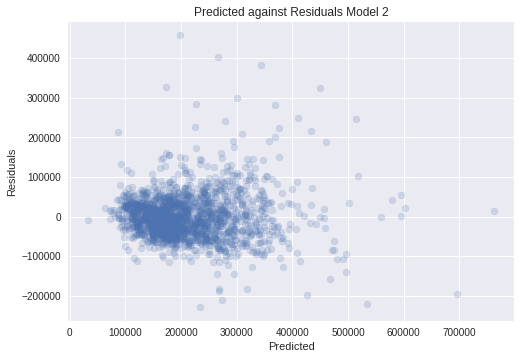

In [ ]:
residuals2 = model_2.resid
predicted2 = model_2.fittedvalues

resid_plot2 = plt.scatter(predicted2,residuals2,alpha = 0.2)
plt.title("Predicted against Residuals Model 2")
plt.xlabel("Predicted")
ax = plt.ylabel("Residuals")


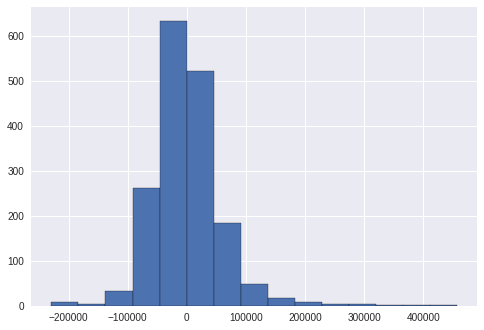

In [ ]:
ax =plt.hist(residuals2,ec = "black",bins = 15)

The residuals plot is fairly similar to that for the base model with a long right tail but is fairly normally distributed otherwise. 

# 10.0 Improving the Model - Interaction Terms

Interactions occur when the effect of an predictor on a response variable depends on the value of another predictor variable.  

Waterfront locations have increased price over non-waterfront. Smaller homes have lower prices than larger homes but it may be that smaller homes in waterfront locations still command higher prices. 

A second question might be that older properties tend to be valued lower but is there an interaction between age of property and waterfront location such that waterfront properties that are old are not valued as low.

In each case the location might be affecting the relationship of the other variable with price.

## 10.1 Waterfront Properties Investigation

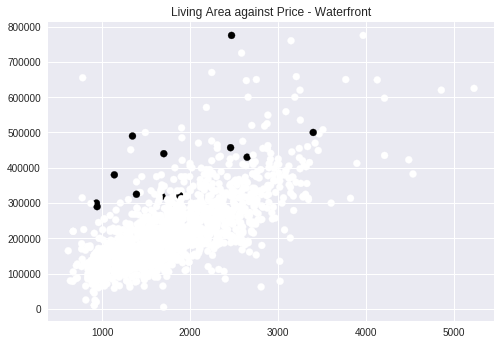

In [ ]:
plt.scatter(data["Living.Area"],data["Price"],c = data["Waterfront"])
ax = plt.title("Living Area against Price - Waterfront")


Waterfront homes as noted previously are found in homes up to 3,500 square feet and 500,000 dollars.

## 10.2 Waterfront and Living Area

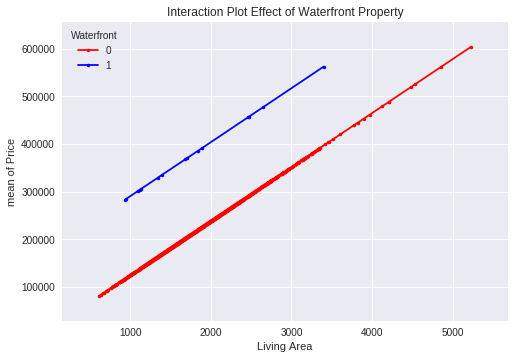

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
X_water = data[["Living.Area","Waterfront"]]
price_w = data["Price"]
X_water.insert(0, 'const', float(1.0))
water = sm.OLS(price_w, X_water.astype(float)).fit()
fig = interaction_plot(data["Living.Area"], data["Waterfront"],water.fittedvalues, colors=['red','blue'],
                       ylabel='Price', xlabel='Living Area')
ax = plt.title("Interaction Plot Effect of Waterfront Property")

In [ ]:
# summary results for when watefront is set to 1
print(water.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     989.0
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          3.57e-287
Time:                        17:15:06   Log-Likelihood:                -21737.
No. Observations:                1734   AIC:                         4.348e+04
Df Residuals:                    1731   BIC:                         4.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.131e+04   4853.267      2.330      

In [ ]:
X_water2 = data[["Living.Area","Waterfront"]]
price_w2 = data["Price"]
X_water2.insert(0, 'const', float(0))
water2 = sm.OLS(price_w2, X_water2.astype(float)).fit()
print(water2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              9511.
Date:                Fri, 10 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:15:06   Log-Likelihood:                         -21740.
No. Observations:                1734   AIC:                                  4.348e+04
Df Residuals:                    1732   BIC:                                  4.350e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

The mean value of price against living area and against age for waterfront and non-waterfront homes is plotted. The equations are of the form:

$y = B0 + B1(Living Area) + B2(Waterfront) $

$y = B0 + B1(Living Area) + B2(Non-Waterfront) $

where waterfront is coded as 1 and non-waterfront is coded as 0

The intercept for waterfront is $B0 + B2$

The intercept for non-waterfront is $B0$

The distance between the two lines represents the difference in price for a waterfront home as opposed to non-waterfront. The lines appear parallel from the plot, so there is no visible interaction between the variables. 
 
However, where the lines are not parallel, the slopes of the lines are different and there is an interaction.  From the summary of the simple regressions run with waterfront = 0 and waterfront = 1, the equations are:

$y = 113(Living Area) + 165,600(Waterfront)$

$y = 119(Living Area)$



## 10.3 Waterfront and Age

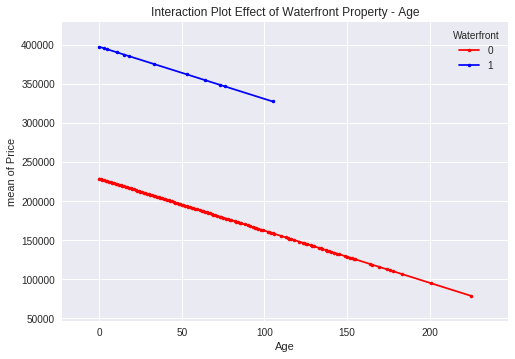

In [ ]:
X_age = data[["Age","Waterfront"]]
X_age.insert(0, 'const', float(1.0))
age = sm.OLS(price_w, X_age.astype(float)).fit()
fig = interaction_plot(data["Age"], data["Waterfront"],age.fittedvalues, colors=['red','blue'],
                       ylabel='Price', xlabel='Age')
ax = plt.title("Interaction Plot Effect of Waterfront Property - Age")

The second chart clearly shows that waterfront properties are found only in houses up to around 100 years old suggesting the second research question is not relevant.


Interaction variables were added to the current best model - for Waterfront x Living Area and then Waterfront x Age but only the former was significant.

Other interaction terms were investigated reusing the code, including those relating to the collinear variables:

* rooms and bedrooms

* rooms and bathrooms

* rooms and living area

* bedroom and living area

* bedroom and bathrooms

* bathrooms and living area

Note: Collinear variables may or may not interact differently on the response and this is often an area of confusion. Collinear variables will not necessarily interact.


## 10.4 Model 3 - Waterfront 

In [ ]:
X_constant = X_constant.drop(columns= ["Heat_electric","Sewer_none","Fireplaces","Sewer_priv","Pct.College","Fuel_oil",
                                       "Heat_none","Fuel_none"])
X_constant["WaterLiving"] = data["Waterfront"]*data["Living.Area"]
model_3 = sm.OLS(price, X_constant).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:15:07   Log-Likelihood:                -21474.
No. Observations:                1734   AIC:                         4.298e+04
Df Residuals:                    1719   BIC:                         4.306e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.714e+04   6945.147      2.468

Running the model including the interaction term, the adjusted R squared has increased slightly to 0.653 compared to the base, so 65.3% of the price variation is explained by the model. The p-value for the F-statistic is significant so the model with all the predictors is better than an intercept only model. The p-values are all significant at 0.05, with the exception of the other Fuel Types already discussed.



## 10.5 Backwise Selection - Model 3

In [ ]:
# Compare AICs
X_constant = X_constant.drop(columns = ["const"])
model_comparing(price,X_constant)

,Adj R-sqr,AIC
Fuel_other,0.652726,42977.2
WaterLiving,0.652062,42980.5
Heat_hotwater,0.651829,42981.7
Fuel_elec,0.65175,42982
Central.Air,0.651438,42983.6
Age,0.651401,42983.8
Bedrooms,0.651176,42984.9
Rooms,0.650949,42986
Lot.Size,0.650398,42988.8
Waterfront,0.647943,43000.9


In [ ]:
# The model does not improve from dropping Fuel_other
model_comparing(price,X_constant.drop(columns = ["Fuel_other"]))

,Adj R-sqr,AIC
WaterLiving,0.651925,42980.2
Heat_hotwater,0.651763,42981
Fuel_elec,0.651656,42981.5
Central.Air,0.65128,42983.4
Bedrooms,0.651081,42984.4
Age,0.651079,42984.4
Rooms,0.650801,42985.8
Lot.Size,0.650256,42988.5
Waterfront,0.647787,43000.7
New.Construct,0.644574,43016.4


No terms were removed.

## 10.6 Model 3 - Residuals Analysis

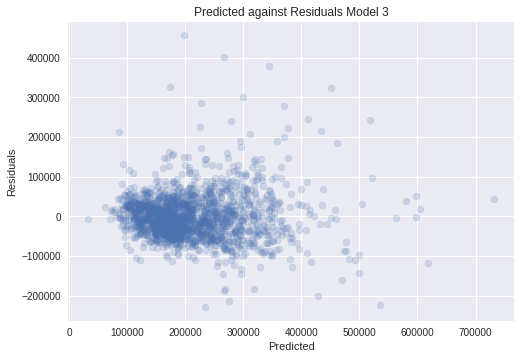

In [ ]:
residuals3 = model_3.resid
predicted3 = model_3.fittedvalues

new_model_plot = plt.scatter(predicted3,residuals3,alpha = 0.2)
plt.title("Predicted against Residuals Model 3")
plt.xlabel("Predicted")
ax = plt.ylabel("Residuals")


In [ ]:
#Breusch pagan test for heteroscedascity ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
result_bp = sm.stats.diagnostic.het_breuschpagan(residuals3, model_3.model.exog)
print("Lagrange multiplier: ",result_bp[0])
print("p-value: ",result_bp[1])
print("f-value: ",result_bp[2])
print("f p-value: ",result_bp[3])

Lagrange multiplier:  113.90432051081459
p-value:  9.752275011143683e-18
f-value:  8.632714432371689
f p-value:  2.216617677426842e-18


There is still quite a lot of variance across the plot and the statistical test is significant at 0.05%

## 10.7 Model 3 - Summary

The interaction term did improve the model slightly but the improvement is small. There may be many other interactions amongst variables in the model that could be identified but the small improvements need to be balanced against the negative factor of creating a more complicated model overall which can lead to overfitting. 

# 11.0 Transformations - Independent Variables

Transformations can help to normalise models and deal with unequal variance. Various transformations were investigated with respect to one predictor variable - Age and then for the model overall.

##11.1 Age

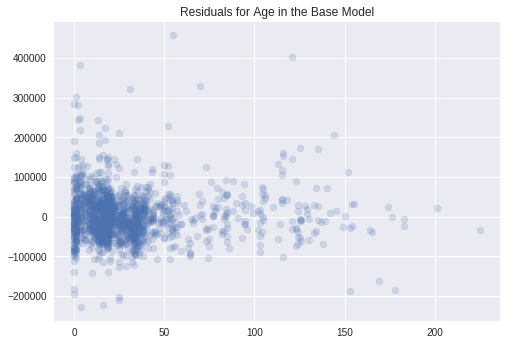

In [ ]:
plt.scatter(data["Age"],residuals1,alpha = 0.2)
ax = plt.title("Residuals for Age in the Base Model")

The residuals for Age from the base model, might have some curvature. Adding a transformation term for 'Age' could improve the fit of the model. There are some zero values in the data so reciprocals and logs will not be suitable. Different transformations such as age squared, cubed and 1/age were tried, by altering the formula accordingly with the best found to be square root.

## 11.2 Model 4 - Age Transformed Variable 

In [ ]:
X_constant["rootAge"] = (X_constant["Age"])**0.5
X_constant = sm.add_constant(X_constant)
model_4 = sm.OLS(price, X_constant).fit()
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     220.6
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:15:08   Log-Likelihood:                -21467.
No. Observations:                1734   AIC:                         4.297e+04
Df Residuals:                    1718   BIC:                         4.305e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.021e+04   9441.786      4.259

The adjusted R-squared increased slightly. The p-value for the F-statistic and p-values for all coefficients except Fuel_other and Heat_hotwater. In particular the new interaction term and the main variables Age are significant.

## 11.3 Model 4 - Residuals

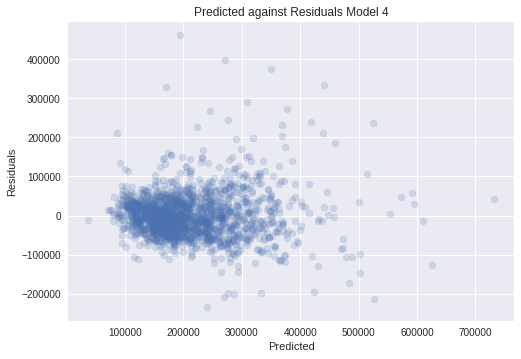

In [ ]:
residuals4 = model_4.resid
predicted4 = model_4.fittedvalues

model_4_plot = plt.scatter(predicted4,residuals4,alpha = 0.2)
plt.title("Predicted against Residuals Model 4")
plt.xlabel("Predicted")
ax = plt.ylabel("Residuals")

In [ ]:
#Breusch pagan test for heteroscedascity ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
result_bp = sm.stats.diagnostic.het_breuschpagan(residuals4, model_4.model.exog)
print("Lagrange multiplier: ",result_bp[0])
print("p-value: ",result_bp[1])
print("f-value: ",result_bp[2])
print("f p-value: ",result_bp[3])

Lagrange multiplier:  123.11954139988205
p-value:  4.6859410551706555e-19
f-value:  8.753778965854533
f p-value:  8.186084688053612e-20


There is no change in variance of the residuals

## 11.4 Backwise Selection - Model 4

In [ ]:
X_constant = X_constant.drop(columns = ["const"])
model_comparing(price,X_constant)

,Adj R-sqr,AIC
Fuel_other,0.655093,42966.3
Heat_hotwater,0.654801,42967.8
Fuel_elec,0.65457,42968.9
Age,0.654365,42970
WaterLiving,0.654301,42970.3
Bedrooms,0.654036,42971.6
Central.Air,0.653693,42973.3
Rooms,0.653471,42974.4
rootAge,0.652853,42977.5
Lot.Size,0.652726,42978.2


In [ ]:
model_comparing(price,X_constant.drop(columns = ["Fuel_other"]))

,Adj R-sqr,AIC
Heat_hotwater,0.654698,42967.3
Fuel_elec,0.65445,42968.6
Age,0.654276,42969.4
WaterLiving,0.654144,42970.1
Bedrooms,0.653917,42971.2
Central.Air,0.653514,42973.2
Rooms,0.653304,42974.3
rootAge,0.652726,42977.2
Lot.Size,0.652565,42978
Waterfront,0.649896,42991.3


No variables removed.

## 11.5 Summary - Model 4

The exercise showed that the model could only be incrementally improved by transforming one of the X variables. 

Further transformations of other variables could be made but the non-constant variance means that the linear model remains unreliable. 

# 12.0 Log Transformation

Earlier analysis showed that the price data/dependent varible is skewed. There is still heteroscedasticity also. 

A logarithmic transformation of the response variable was used against Models 3 and 4 to see what effect they had.

In [ ]:
price_log = np.log(data["Price"])

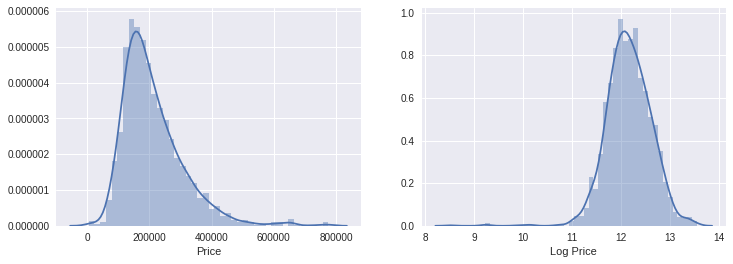

In [ ]:
fig, ax =plt.subplots(1,2,figsize = (12,4))
sns.distplot(price, ax=ax[0])
sns.distplot(price_log, ax=ax[1],axlabel = "Log Price")
fig.show()

In [ ]:
price.skew()

1.5713819640858777

In [ ]:
price_log.skew()

-0.6159044507735352

The log price distribution now shows a negative skew but less than the original positive skew.

## 12.1 Log Linear - Model 3

In [ ]:
X_constant = X_constant.drop(columns = ["rootAge"])
X_constant = sm.add_constant(X_constant)
model_3_log = sm.OLS(price_log, X_constant).fit()
print(model_3_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          4.45e-319
Time:                        17:15:09   Log-Likelihood:                -328.08
No. Observations:                1734   AIC:                             686.2
Df Residuals:                    1719   BIC:                             768.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2671      0.035    320.806

The adjusted R squared is 0.585, so 59% of the variation in price can be explained by this model. However it cannot be directly compared with R squared in the linear model due to scale differences. See 12.0 below.
 
There is a very low p-value for the F-Statistic, so the model with all predictors is better than one with none. However, Heat(Hot Water), Bedrooms and Rooms now have non-significant p-values.

The significance of the Bedrooms and Rooms coefficients are likely being affected by the multicollinearity resulting in large p-values.

## 12.2 Log Linear - Model 4

In [ ]:
X_constant["RootAge"] = data["Age"]**0.5
X_constant = sm.add_constant(X_constant)
model_4_log = sm.OLS(price_log, X_constant).fit()
print(model_4_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          2.79e-318
Time:                        17:15:09   Log-Likelihood:                -327.30
No. Observations:                1734   AIC:                             686.6
Df Residuals:                    1718   BIC:                             773.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.3076      0.048    236.046

## 12.3 Comparison of Log Models 3 and 4

The adjusted R squared is 0.586, slightly better than the model 3 log model.
 
There is a very low p-value for the F-Statistic, so the model with all predictors is better than one with none. However, as well as the previous Heat(Hot Water), Bedrooms and Rooms, the Age and Interaction variable for Age are also non-significant. The AIC for Model 3 is also lower than for Model 4.

Model 3 transformed is the preferred model.


## 12.4 Backwise Selection - Log Linear Model 3

In [ ]:
X_constant = X_constant.drop(columns = ["RootAge","const"])

In [ ]:
def model_comparing2(y,X):
  comparing_models = pd.DataFrame(index = X.columns, columns=['Adj R-sqr', 'AIC'])
  for i in X.columns:
    X_with_c = sm.add_constant(X)
    house_price = sm.OLS(y, X_with_c.astype(float).drop(columns= i)).fit()
    row = {'Adj R-sqr': house_price.rsquared_adj ,'AIC': house_price.aic}
    comparing_models.loc[i] = row
  
  comparing_models.sort_values(by=['AIC'],inplace=True)
    
  return comparing_models

model_comparing2(price_log,X_constant)

,Adj R-sqr,AIC
Heat_hotwater,0.585455,685.205
Bedrooms,0.585275,685.954
Rooms,0.585079,686.776
Central.Air,0.583992,691.313
Fuel_other,0.582717,696.616
WaterLiving,0.58262,697.022
Fuel_elec,0.582617,697.034
Lot.Size,0.5825,697.521
New.Construct,0.57966,709.276
Age,0.578544,713.871


In [ ]:
model_comparing2(price_log,X_constant.drop(columns = ["Heat_hotwater"]))

,Adj R-sqr,AIC
Bedrooms,0.585319,684.78
Rooms,0.585049,685.909
Central.Air,0.583448,692.586
Fuel_elec,0.582832,695.15
Fuel_other,0.582791,695.317
WaterLiving,0.582612,696.064
Lot.Size,0.58259,696.156
New.Construct,0.579837,707.554
Waterfront,0.578214,714.238
Age,0.577661,716.508


### 12.5 Fitting Improved Model 5

In [ ]:
np.exp(0.01609)

1.0162201411032261

In [ ]:
X_constant = X_constant.drop(columns = ["Heat_hotwater"])
X_constant = sm.add_constant(X_constant)
model_5 = sm.OLS(price_log, X_constant).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     189.3
Date:                Fri, 10 Jan 2020   Prob (F-statistic):          5.31e-320
Time:                        17:15:10   Log-Likelihood:                -328.60
No. Observations:                1734   AIC:                             685.2
Df Residuals:                    1720   BIC:                             761.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2688      0.035    321.205

## 12.6 Interpreting Log Model Coefficients

In [ ]:
# Sorting p-values to identify those that are significant
change = round(((np.exp(model_5.params))-1)*100,2)
units = ["","Acres","yrs","$","sq ft","No.","No.","No.","Y/N","Y/N","Y/N","Y/N","Y/N","Y/N"]
log_model_coeff = pd.DataFrame({"unit":units,'coef':model_5.params, 'p-values': round(model_5.pvalues,3),"% chnge":change})
log_model_coeff[1:].sort_values(by = "p-values")

,unit,coef,p-values,% chnge
Lot.Size,Acres,0.036949,0.000,3.76
Age,yrs,-0.001590,0.000,-0.16
Land.Value,$,0.000004,0.000,0.00
Living.Area,sq ft,0.000281,0.000,0.03
Bathrooms,No.,0.104337,0.000,11.00
Waterfront,Y/N,1.139563,0.000,212.54
New.Construct,Y/N,-0.177109,0.000,-16.23
WaterLiving,Y/N,-0.000393,0.000,-0.04
Fuel_elec,Y/N,-0.067789,0.001,-6.55
Fuel_other,Y/N,-0.594193,0.001,-44.80


**MODEL 5**

Because of the log transformation of the dependent variable, the coefficients are interpreted differently from the previous model. Assumptions are that all other variables are held constant, that the coefficient is statistically significant and that the Gasuss Markov assumptions are met.

Each 1 unit increase in X multiplies the expected value of Y by eβˆ

**Example**

Each acre increase of lot size increases the
untransformed house price by a multiple of e0.0376 = 1.069 – or a 3.7% increase on average. 

Similarly:

Waterfront location increases the untransformed house price by e1.14  - or (3.12-1) x 100 or 212% on average.

A ten year increase in age will result in a 1.6% fall in price on average, assuming all other variables are held constant.

The table above summarises the change in price for each coefficient - all other variables held constant.

[Source1](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/)

[Source2](http://www.cazaar.com/ta/econ113/interpreting-beta)



## 12.7 Residuals - Model 5

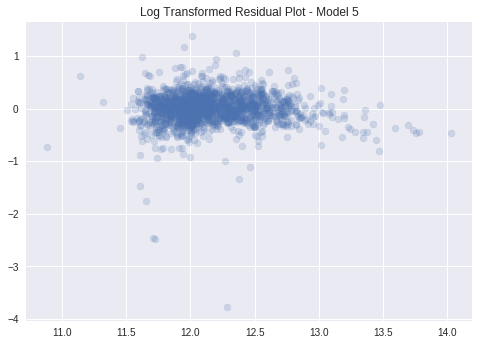

In [ ]:
predicted5 = model_5.fittedvalues
residuals5 = model_5.resid
plt.title("Log Transformed Residual Plot - Model 5")
ax = plt.scatter(predicted5,residuals5,alpha = 0.2)

In [ ]:
# Shapiro Wilks
from scipy.stats import shapiro
statistic, p = shapiro(residuals5)
print('Statistics=%.3f, p=%.3f' % (statistic, p))
alpha = 0.05
if p > alpha:
	print('Appears Normally distributed (fail to reject H0)')
else:
	print('Does not Appear Normally Distributed (reject H0)')

Statistics=0.884, p=0.000
Does not Appear Normally Distributed (reject H0)


In [ ]:
result_bp = sm.stats.diagnostic.het_breuschpagan(residuals5, model_5.model.exog)
print("Lagrange multiplier: ",result_bp[0])
print("p-value: ",result_bp[1])
print("f-value: ",result_bp[2])
print("f p-value: ",result_bp[3])

Lagrange multiplier:  11.516344365665066
p-value:  0.5676449762133475
f-value:  0.8845953004301246
f p-value:  0.5691673296483424


The log transformation does seem to have calmed down the variance in the data from the residuals plot and results of the Breusch pagan statistical test which is now not significant.

There might be a curvature in residuals towards the right side of the plot. Several of the continuous predictor variables had noticeable skews so a log transformation of some of these might address any non-linearity, creating a log-log model. However, this makes the model quite complex to interpret, so the assumptions are accepted as met for the purposes of this short review.

## 12.8 Log Linear and Linear Model Comparison

The log model cannot be compared to a non-log model by comparing the R squared values or AIC since the scales of the models are different. Research found that the predicted values for y have to be back-transformed first. Two references were found as to how to do this:


**Backtransform predicted Y values Model 5 and calculate adjusted R squared**

In [ ]:
back = np.exp(predicted5)
rss = sum((price - back)**2)
price_mean = price.mean()
tss = sum((price - price_mean)**2)
ess = tss-rss
rsquare = ess/tss
r_adj = 1-((1-rsquare)*(len(price)-1))/(len(price)-len(model_5.params)-1)
r_adj

0.5721595591411732

[Source1](https://www.listendata.com/2015/09/predicting-transformed-dependent.html)

[Source2](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/)

**AIC adjusted and Compared with the best linear model 3**


In [ ]:
rss_log = np.log(rss)
AIC_back = (2 * len(model_5.params)) + ((len(price_log)*rss_log))
print("The adjusted backtransformed AIC for log model: ",AIC_back)
print("The linear model AIC: ",model_3.aic)

The adjusted backtransformed AIC for log model:  51349.56038355649
The linear model AIC:  42977.53258942595



[Comparison with least squares](https://en.wikipedia.org/wiki/Akaike_information_criterion)


2k + n(log(RSS))


**Summary**

It appears that using the back transform comparisons that the the log-linear model adjusted AIC is higher than the linear model and the R-squared is lower. 
 
However, the constant variance assumption is not fully met with the best linear model. The choice would be to accept the apparent non-constant variance in the linear model and associated risks or use the log model.

Non-constant variance can make coefficients less precise and p-values smaller than they should be, since high variance predictors can weight the results.Therefore some of the predictor variables may appear significant when they are not. Confidence intervals may also be too wide or narrow.




# 13.0 Confidence Intervals and Prediction Intervals

As this is a fairly complicated model with a lot of explanatory variables a prediction tool was constructed to make entering the x values easier to determine the confidence intervals for the mean response and prediction intervals for a new response. 

The model requires explanatory variable to be entered within the ranges specified as the model does not predict values outside the extent of the dataset.

Please note: This is a very blunt tool, designed to make the input process a little easier and is by no means perfect!!

## 13.1 House Price Prediction Tool

## Log Model 5

In [ ]:
#def predict_tool():

  #Enter details into model for numerical variables
  print("\n")
  print("Welcome to the House Price Prediction Tool")
  print("Enter data as prompted")
  print("\n")
  print("Please enter values within the maximum and minimum values specified only")
  print("For other variables please enter digits as prompted")
  print("\n")

  print("Enter Lot Size between: ", data["Lot.Size"].min()," to ",data["Lot.Size"].max())
  lot_predict = float(input("Lot Size in Acres: "))
  print("Enter Property Age between: ",data["Age"].min()," to ",data["Age"].max())
  age_predict = int(input("Age of property to the nearest whole year: "))
  print("Enter Land Value between: ",data["Land.Value"].min()," to ",data["Land.Value"].max())
  land_predict = int(input("Land value in dollars: "))
  print("Enter Living area in square feet between: ",data["Living.Area"].min()," to ",data["Living.Area"].max())
  living_predict = int(input("Living Area in Square Feet: "))
  print("Enter Number of Bedrooms between: ",data["Bedrooms"].min()," to ",data["Bedrooms"].max())
  bed_predict = int(input("Number of Bedrooms: "))
  print("Enter Number of Bathrooms between: ",data["Bathrooms"].min(), " to ",data["Bathrooms"].max())
  bath_predict = float(input("Number of Bathrooms: "))
  print("Total number of Rooms between: ",data["Rooms"].min()," to ",data["Rooms"].max())
  room_predict = int(input("Total number of rooms "))

# Enter details into model for categorical variables
  waterfront = int(input("Waterfront location Yes = 1, No = 0: "))
  newconstruct = int(input("New Construction Yes = 1, No = 0: "))
  centralair = int(input("Central Airconditioning - Yes = 1, No = 0: "))
  fuel_elec = int(input("Fuel Electric - Yes = 1, No = 0: "))
  fuel_other = int(input("Fuel Other(enter 0 if 1 already entered against Fuel Electric) - Yes = 1, No = 0: ")) 
  # Get prediction
  new_ob = pd.DataFrame({'const':[1],'Lot.Size':lot_predict,'Age':age_predict,'Land.Value':land_predict,'Living.Area':living_predict,
                         'Bedrooms':bed_predict, 'Bathrooms':bath_predict,'Rooms':room_predict,'Waterfront':waterfront, 
                         'WaterLiving':waterfront*living_predict,'New.Construct':newconstruct,'Central.Air':centralair,'Fuel_elec':fuel_elec,
                         'Fuel_other':fuel_other})
  print("\n\n")

  prediction_int = model_5.get_prediction(new_ob).summary_frame(alpha = 0.05)
  prediction_int = np.exp(prediction_int)
   
  return prediction_int

#predict_tool()

In [ ]:
#predict_tool()

## Linear Model 3 Comparison

Running an amended tool for the linear model for comparison

In [ ]:
#def predict_tool2():

  #Enter details into model for numerical variables
  print("\n")
  print("Welcome to the House Price Prediction Tool")
  print("Enter data as prompted")
  print("\n")
  print("Please enter values within the maximum and minimum values specified only")
  print("For other variables please enter digits as prompted")
  print("\n")

  print("Enter Lot Size between: ", data["Lot.Size"].min()," to ",data["Lot.Size"].max())
  lot_predict = float(input("Lot Size in Acres: "))
  print("Enter Property Age between: ",data["Age"].min()," to ",data["Age"].max())
  age_predict = int(input("Age of property to the nearest whole year: "))
  print("Enter Land Value between: ",data["Land.Value"].min()," to ",data["Land.Value"].max())
  land_predict = int(input("Land value in dollars: "))
  print("Enter Living area in square feet between: ",data["Living.Area"].min()," to ",data["Living.Area"].max())
  living_predict = int(input("Living Area in Square Feet: "))
  print("Enter Number of Bedrooms between: ",data["Bedrooms"].min()," to ",data["Bedrooms"].max())
  bed_predict = int(input("Number of Bedrooms: "))
  print("Enter Number of Bathrooms between: ",data["Bathrooms"].min(), " to ",data["Bathrooms"].max())
  bath_predict = float(input("Number of Bathrooms: "))
  print("Total number of Rooms between: ",data["Rooms"].min()," to ",data["Rooms"].max())
  room_predict = int(input("Total number of rooms "))

# Enter details into model for categorical variables
  waterfront = int(input("Waterfront location Yes = 1, No = 0: "))
  newconstruct = int(input("New Construction Yes = 1, No = 0: "))
  centralair = int(input("Central Airconditioning - Yes = 1, No = 0: "))
  fuel_elec = int(input("Fuel Electric - Yes = 1, No = 0: "))
  fuel_other = int(input("Fuel Other(enter 0 if 1 already entered against Fuel Electric) - Yes = 1, No = 0: ")) 
  heat_hotwater = int(input("Heat Hotwater - Yes = 1, No = 0: "))
 # Get prediction
  new_ob = pd.DataFrame({'const':[1],'Lot.Size':lot_predict,'Age':age_predict,'Land.Value':land_predict,'Living.Area':living_predict,
                         'Bedrooms':bed_predict, 'Bathrooms':bath_predict,'Rooms':room_predict,'Waterfront':waterfront, 
                         'WaterLiving':waterfront*living_predict,'New.Construct':newconstruct,'Central.Air':centralair,'Heat_hotwater':heat_hotwater,'Fuel_elec':fuel_elec,
                         'Fuel_other':fuel_other})
  print("\n\n")

  prediction_int2 = model_3.get_prediction(new_ob).summary_frame(alpha = 0.05)
    
  return prediction_int2

#predict_tool2()

In [ ]:
#predict_tool2()